# Lyft Bike Trip Data Exploration
## by Rongrong Liu

## Preliminary Wrangling

> This document explores a dataset containing ride_id and other aspects of a trip for approximately 138,000 bike trips in 05/20 from Lyft.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_2005 = pd.read_csv('202005-baywheels-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
df_2005.shape

(138251, 14)

In [5]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
ride_id               138251 non-null object
rideable_type         138251 non-null object
started_at            138251 non-null object
ended_at              138251 non-null object
start_station_name    87315 non-null object
start_station_id      87315 non-null float64
end_station_name      84779 non-null object
end_station_id        84779 non-null float64
start_lat             138251 non-null float64
start_lng             138251 non-null float64
end_lat               138027 non-null float64
end_lng               138027 non-null float64
member_casual         138251 non-null object
is_equity             138251 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 13.8+ MB


In [6]:
df_2005.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False


In [7]:
# descriptive statistics for numeric variables
df_2005.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,87315.000000,84779.000000,138251.000000,138251.000000,138027.000000,138027.000000
mean,227.397022,226.186567,37.722310,-122.343617,37.722268,-122.344021
std,170.232761,170.207720,0.151435,0.182993,0.151488,0.183225
min,3.000000,3.000000,37.239200,-122.514300,37.004600,-122.559000
25%,74.000000,74.000000,37.760100,-122.433700,37.760000,-122.433800
50%,177.000000,171.000000,37.773500,-122.413200,37.773500,-122.413200
75%,386.000000,386.000000,37.787300,-122.390400,37.787400,-122.390600
max,521.000000,521.000000,37.880200,-121.774600,37.962100,-121.560600


### What is the structure of your dataset?

> There are 138251 trips in the dataset with 14 features ('ride_id', 'rideable_type', 'started_at', 'ended_at',
'start_station_name', 'start_station_id', 'end_station_name','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng','member_casual', 'is_equity'). Only four variables are numeric in nature, the rest of them are all categorical including the start_station_id and end_station_id.

### What is/are the main feature(s) of interest in your dataset?

> I am very interested in the difference between the trips of a subscriber(member) and the trips of a customer(casual).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the "started_at" and "ended_at" columns can provide usful info to my interest, like I can caculate the duration of each trip.

## Univariate Exploration

> I'll start by looking at the distribution of the duration of each trip. 

In [4]:
# Since the duration is not a column provided, we need to caculate it first by ended_at - started_at.
# To process this caculation, I need to change the datatype of these two columns from object to Datetime.
df_2005.started_at = pd.to_datetime(df_2005.started_at)
df_2005.ended_at = pd.to_datetime(df_2005.ended_at)

In [5]:
# Test the results 
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
ride_id               138251 non-null object
rideable_type         138251 non-null object
started_at            138251 non-null datetime64[ns]
ended_at              138251 non-null datetime64[ns]
start_station_name    87315 non-null object
start_station_id      87315 non-null float64
end_station_name      84779 non-null object
end_station_id        84779 non-null float64
start_lat             138251 non-null float64
start_lng             138251 non-null float64
end_lat               138027 non-null float64
end_lng               138027 non-null float64
member_casual         138251 non-null object
is_equity             138251 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(6), object(5)
memory usage: 13.8+ MB


In [5]:
# Add a new column 'duration' to the dataset
df_2005['duration'] = df_2005['ended_at'] - df_2005['started_at']

In [7]:
# Test the results
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 15 columns):
ride_id               138251 non-null object
rideable_type         138251 non-null object
started_at            138251 non-null datetime64[ns]
ended_at              138251 non-null datetime64[ns]
start_station_name    87315 non-null object
start_station_id      87315 non-null float64
end_station_name      84779 non-null object
end_station_id        84779 non-null float64
start_lat             138251 non-null float64
start_lng             138251 non-null float64
end_lat               138027 non-null float64
end_lng               138027 non-null float64
member_casual         138251 non-null object
is_equity             138251 non-null bool
duration              138251 non-null timedelta64[ns]
dtypes: bool(1), datetime64[ns](2), float64(6), object(5), timedelta64[ns](1)
memory usage: 14.9+ MB


In [8]:
# Check the new column. 
df_2005.duration

0        00:12:14
1        00:32:21
2        00:06:11
3        00:09:08
4        00:43:35
           ...   
138246   00:19:59
138247   00:07:31
138248   02:07:51
138249   00:18:59
138250   00:21:15
Name: duration, Length: 138251, dtype: timedelta64[ns]

In [6]:
# Since the datatype is timedelta64[ns], I can't plot derectly. 
# Change the timedelta64[ns] to int first
mins = []
for i in df_2005.duration:
    mins.append(i.components.hours * 60 + i.components.minutes)
df_2005['duration'] = mins

In [10]:
# Check the results
df_2005.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,duration
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False,12
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False,32
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False,6
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual,False,9
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual,False,43


In [11]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 15 columns):
ride_id               138251 non-null object
rideable_type         138251 non-null object
started_at            138251 non-null datetime64[ns]
ended_at              138251 non-null datetime64[ns]
start_station_name    87315 non-null object
start_station_id      87315 non-null float64
end_station_name      84779 non-null object
end_station_id        84779 non-null float64
start_lat             138251 non-null float64
start_lng             138251 non-null float64
end_lat               138027 non-null float64
end_lng               138027 non-null float64
member_casual         138251 non-null object
is_equity             138251 non-null bool
duration              138251 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(5)
memory usage: 14.9+ MB


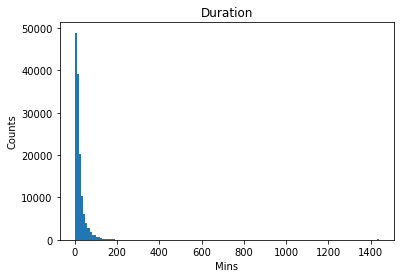

In [8]:
# Use a histgramp to plot the duration column
binsize = 10
bins = np.arange(0, df_2005.duration.max()+binsize, binsize)
plt.hist(data = df_2005, x = 'duration', bins = bins);
plt.title('Duration');
plt.xlabel('Mins');
plt.ylabel('Counts');

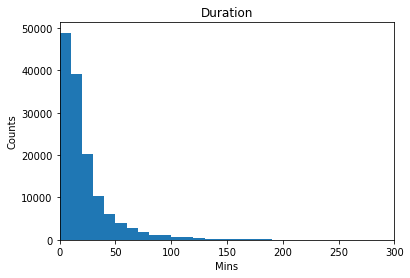

In [9]:
# The data has some outliers around 1400 mins. Since there's no data during 200 to 1400, we can just ignore it by \
# zoom in the plot.
binsize = 10
bins = np.arange(0, df_2005.duration.max()+binsize, binsize)

plt.hist(data = df_2005, x = 'duration', bins = bins);
plt.title('Duration');
plt.xlabel('Mins');
plt.ylabel('Counts');
plt.xlim(0, 300);

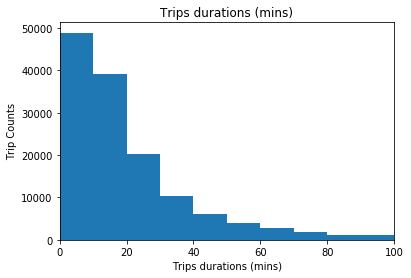

In [13]:
# For a closer look
binsize = 10
bins = np.arange(0, df_2005.duration.max()+binsize, binsize)

plt.hist(data = df_2005, x = 'duration', bins = bins);
plt.xlim(0, 100);
plt.title('Trips durations (mins)');
plt.xlabel('Trips durations (mins)');
plt.ylabel('Trip Counts');

> From the plot above, we can see that almsot 80% of the trips fall in 30 mins. When the duration increads, the trips accordingly decreases. 

Next step, let's look at the distribution of the rideable_types.

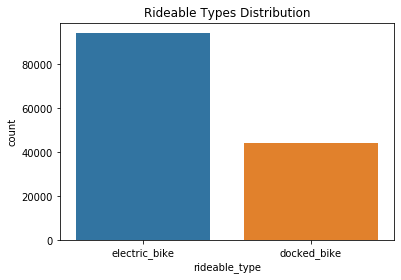

In [10]:
sb.countplot(data = df_2005, x = 'rideable_type');
plt.title('Rideable Types Distribution');

> From the plot above, we can see that the trips using a docked bike are only half of the electric bikes.

Then let's look at the distribution of the member_casual trips distribution.

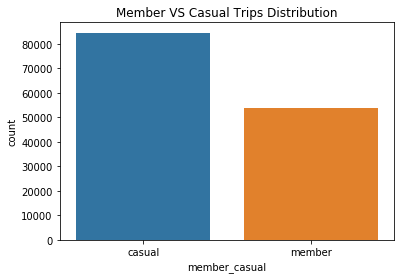

In [11]:
sb.countplot(data = df_2005, x = 'member_casual');
plt.title('Member VS Casual Trips Distribution');

> From the bars above, we can see that the Member trips are only 2/3 of the Casual trips.

Next step, I want to see the what time riders prefer to start and end a trip. Since we don't have direct data about this we can use, we need to create a column when a trip starts and a column when a trip ends.

In [12]:
df_2005['started_time'] = df_2005['started_at'].dt.hour
df_2005['ended_time'] = df_2005['ended_at'].dt.hour

Text(0, 0.5, 'Counts')

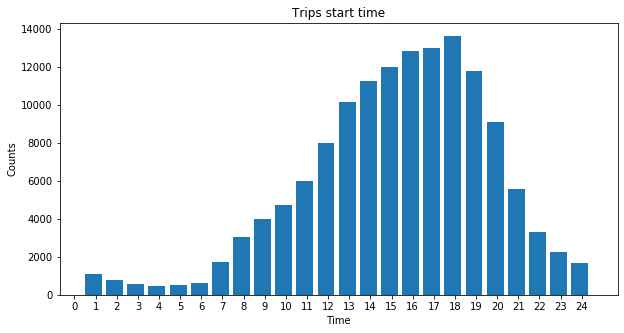

In [13]:
plt.figure(figsize=(10,5))
time_bins = range(0, 25)
plt.hist(data = df_2005, x = "started_time", bins = time_bins, align='right', width=0.8);
plt.xticks(time_bins, time_bins);
plt.title('Trips start time');
plt.xlabel('Time');
plt.ylabel('Counts')

> From the plot above we can see, around 5pm to 6pm is the peak, the most trips happen this time, and from 2am to 5am  has the least trips.

Let's look at the ends time also.

Text(0, 0.5, 'Counts')

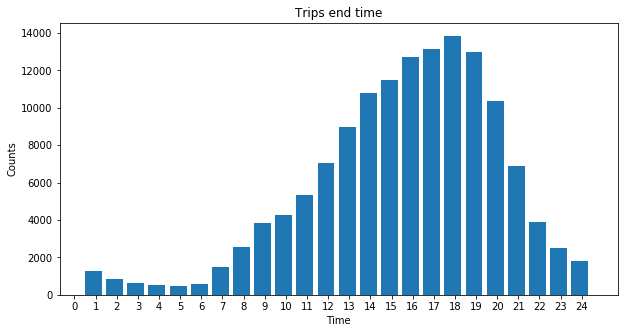

In [14]:
plt.figure(figsize=(10,5))
time_bins = range(0, 25)
plt.hist(data = df_2005, x = "ended_time", bins = time_bins, align='right', width=0.8);
plt.xticks(time_bins, time_bins);
plt.title('Trips end time');
plt.xlabel('Time');
plt.ylabel('Counts')

> The plot ended time is almost like the plot started time, since most trips last only 30mins(got this from the first plot).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of duration is: the most trips fall into 30 mins, there're noly 20% of the trips beyound 30 mins. When the duration increae, the trips decrease. There're some outliers around 1400 mins. 1400 mins is almost a whole day and night, so the data maybe not correct, like forgot to lock the bike then the meter didn't stop. I don't think I need any tranformations, since the distribution dosen't have a long tail, the plot intensively distribued around 0-300 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Since the original data only have the started_at(started time) and ended_at(ended time), I need to add a duration column by ended_at - started_at. After I got the duration column, I found that the datatype is timedelta64[ns], I can't plot derectly. Then I changed the timedelta64[ns] to int before plotting. To plot what time a trip start and end, I extract start and end the hour from the started_time and ended_time columns.

## Bivariate Exploration

> In this section, first, I will investigate the relationship between the duration and the rideable_type.

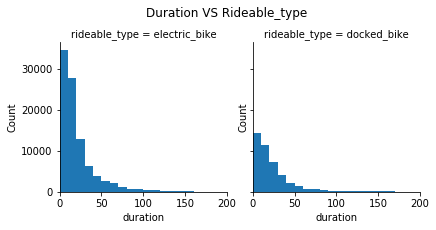

In [15]:
g = sb.FacetGrid(data = df_2005, col = 'rideable_type')
g.map(plt.hist, 'duration', bins = bins)
plt.xlim(0, 200);
plt.suptitle('Duration VS Rideable_type', y = 1.05)
g.set(ylabel = 'Count')

In [16]:
df_2005.rideable_type.value_counts()

electric_bike    94251
docked_bike      44000
Name: rideable_type, dtype: int64


> In this plot above, I found that the trips of clectric_bike are almost two times of the trips of docked_bike, and  the duration range of elctric_bike is a little shorter than docked_bike.


Now let's investigate the relationship between the duration and the member_casual.

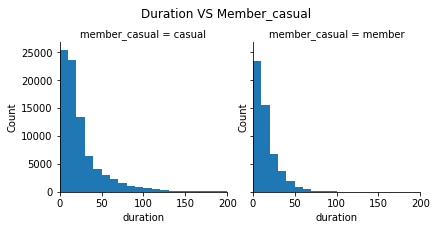

In [17]:
g = sb.FacetGrid(data = df_2005, col = 'member_casual');
g.map(plt.hist, 'duration', bins = bins);
plt.xlim(0, 200);
plt.suptitle('Duration VS Member_casual', y = 1.05);
g.set(ylabel = 'Count');

In [11]:
df_2005.member_casual.value_counts()

casual    84519
member    53732
Name: member_casual, dtype: int64

> From the plot above and the value_counts function, we can see that the trips made by members are much less than the trips made by customers, and also the proportion of the within 30mins trips for the casual is bigger than that for the member. There are more trips last longer than 50mins.

Next, let's have a look at the relationship between the start hours and the duration.

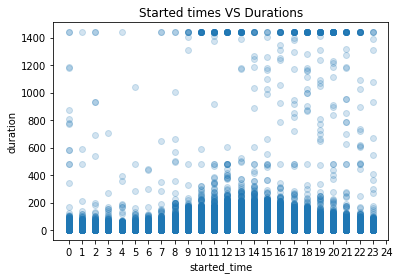

In [18]:
plt.scatter(data = df_2005, x = 'started_time', y = 'duration', alpha = 1/5);
plt.xticks(time_bins, time_bins);
plt.title('Started times VS Durations');
plt.xlabel('started_time');
plt.ylabel('duration');

> Form the plot above we can see that the trip duration gets its peak at around 12pm. Overall the trips after 12pm have a bigger duration than the ones before 12pm, and have more longer duration trips.

Let's have a look at the trips lantitude range from startting to endding.  

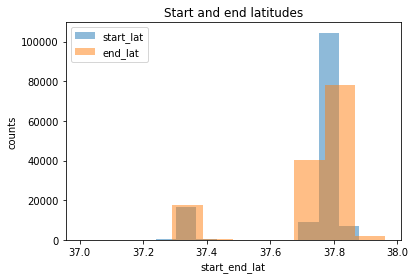

In [19]:
plt.hist(data = df_2005, x = 'start_lat', label = 'start_lat',  alpha = 0.5);
plt.hist(data = df_2005, x = 'end_lat', label = 'end_lat',  alpha = 0.5);
plt.legend(loc = 'best')
plt.title('Start and end latitudes');
plt.xlabel('start_end_lat');
plt.ylabel('counts');
plt.show();

> From the plot above, we can see, all trips start from two main lantitude: one is around 37.3, another is around 37.8. There are more trips happen around 37.8. Lantitude 37.7-37.9 is the main area where trips stopped.

Also, Let's have a look at the trips longitude range from startting to endding.  

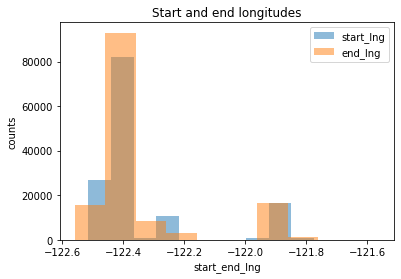

In [20]:
plt.hist(data = df_2005, x = 'start_lng', label = 'start_lng',  alpha = 0.5);
plt.hist(data = df_2005, x = 'end_lng', label = 'end_lng',  alpha = 0.5);
plt.legend(loc = 'best')
plt.title('Start and end longitudes');
plt.xlabel('start_end_lng');
plt.ylabel('counts');
plt.show();

From the plot above, we can see, all trips end at two main longitude: one is around -122.4, another is around -121.9. There are more trips end at around -122.4. Lantitude -122.5 to -122.2 is the main area where trips stopped.

From the two plots above, we can see there are two main areas we can use Lyft bike, one is (lat 37.8, lng -122.4), another one is (lat 37.3, lng -121.9).

## Multivariate Exploration

> In this multivariate exploration section, I am really curious about the relationship between member_casual with the duration and the rideable type; the relationship between the start times with the duration and the rideable type; the relationship between the start times with the duration and the member_casual.

 Now, let's look at the relationship between the member_casual with the duration and the rideable type.

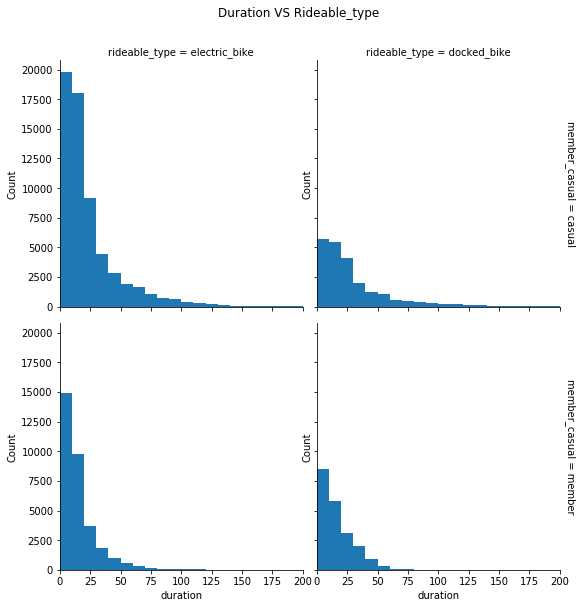

In [21]:
g = sb.FacetGrid(data = df_2005, col = 'rideable_type', row = 'member_casual',margin_titles= True, size = 4);
g.map(plt.hist, 'duration', bins = bins);
plt.xlim(0, 200);
plt.suptitle('Duration VS Rideable_type', y = 1.05);
g.set(ylabel = 'Count');

In [22]:
df_2005.groupby('rideable_type')['member_casual'].value_counts()

rideable_type  member_casual
docked_bike    casual           22855
               member           21145
electric_bike  casual           61664
               member           32587
Name: member_casual, dtype: int64

> From this plot, we can see that the number of member trips is much less than the number of customer trips. For electric_bike, there's no big difference of the distribution of customer and member, just the trip amount of customer is two times than member. For docked_bike, the trip amount is almost the same, but not like member, the customer prefers longer trips. 

let's look at the relationship between the start times with the duration and the rideable type.

<Figure size 720x576 with 0 Axes>

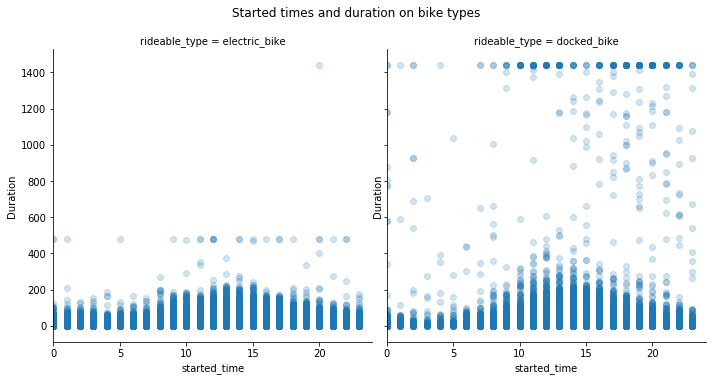

In [39]:
g = sb.FacetGrid(data = df_2005, col = 'rideable_type', margin_titles= True, size=5);
g.map(plt.scatter, 'started_time', 'duration', alpha = 1/5);
plt.xlim(0, 24);
plt.suptitle('Started times and duration on bike types', y = 1.05);
g.set(ylabel = 'Duration');

> From the plots above, we can see that overall the docked_bike trips last longer than the electic_bike trips. There are a lot of docked_bike trips acually last 1400 mins. There's no big difference for the electric_bike trips durations according the start time, however, it's not the same for docked_bike trips.

Now let's look at the relationship between the start times with the duration and the member_casual.

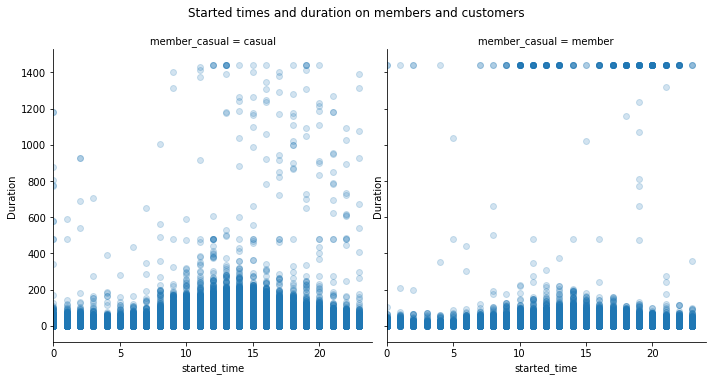

In [41]:
g = sb.FacetGrid(data = df_2005, col = 'member_casual', margin_titles= True, size=5);
g.map(plt.scatter, 'started_time', 'duration', alpha = 1/5);
plt.xlim(0, 24);
plt.suptitle('Started times and duration on members and customers', y = 1.05);
g.set(ylabel = 'Duration');

> From the plots above, we can see that the durations for customer trips are longer than member trips durations, this is may becuase that we have more customer trips. But the members trips have more superlong trips around 1400 mins, and evenly distributed according the start times.